In [5]:
import geopandas as gpd
import os

In [6]:
if os.path.exists("covid.geojson"):
    print("have a file")
    df = gpd.read_file("covid.geojson")
else:
    print("download it")
    df = gpd.read_file("https://dhsgis.wi.gov/server/rest/services/DHS_COVID19/COVID19_WI_V2/MapServer/9/query?outFields=*&where=1%3D1&f=geojson")
    df.to_file("covid.geojson")

have a file


In [8]:
print(df.columns)
df.head()

Index(['RptDt', 'GEOID', 'GEOName', 'POS_CUM_CP', 'POS_NEW_CP',
       'POS_7DAYAVG_CP', 'DTH_CUM_CP', 'DTH_NEW_CP', 'DTH_7DAYAVG_CP',
       'DTH_OVER_30DAYS_CP', 'DTH_CP_Daily', 'TESTS_POS_CONF',
       'TESTS_POS_CONF_NEW', 'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos',
       'TESTS_CUM', 'TESTS_NEW', 'TESTS_7DAYAVG', 'POS_CUM_CONF',
       'POS_NEW_CONF', 'POS_7DAYAVG_CONF', 'POS_CUM_PROB', 'POS_NEW_PROB',
       'POS_7DAYAVG_PROB', 'DTH_CUM_CONF', 'DTH_NEW_CONF', 'DTH_7DAYAVG_CONF',
       'DTH_CONF_Daily', 'DTH_CUM_PROB', 'DTH_NEW_PROB', 'DTH_7DAYAVG_PROB',
       'DTH_PROB_Daily', 'POS_MALE_CP', 'POS_FEM_CP', 'POS_OTH_CP',
       'POS_0_9_CP', 'POS_10_19_CP', 'POS_20_29_CP', 'POS_30_39_CP',
       'POS_40_49_CP', 'POS_50_59_CP', 'POS_60_69_CP', 'POS_70_79_CP',
       'POS_80_89_CP', 'POS_90_CP', 'DTHS_FEM_CP', 'DTHS_MALE_CP',
       'DTHS_OTH_CP', 'DTHS_0_9_CP', 'DTHS_10_19_CP', 'DTHS_20_29_CP',
       'DTHS_30_39_CP', 'DTHS_40_49_CP', 'DTHS_50_59_CP', 'DTHS_60_69_CP',
       'DTH

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,Shape.STArea(),Shape.STLength(),geometry
0,1668024000000,55001950100,None,978,1,0.57,13,0,0.0,0,...,573,357,1667887200000,2870,66.0,1156,Census tract,4.894706e+08,108089.745033,"POLYGON ((-89.72475 44.24769, -89.72492 44.247..."
1,1668024000000,55001950201,None,342,0,0.00,5,0,0.0,0,...,152,167,1667887200000,1244,96.0,1157,Census tract,2.277343e+08,97033.719846,"POLYGON ((-89.73892 43.98186, -89.73925 43.982..."
2,1668024000000,55001950202,None,628,2,0.86,7,0,0.0,0,...,352,257,1667887200000,2599,146.0,1158,Census tract,1.004937e+09,162456.681081,"POLYGON ((-89.90890 44.17627, -89.90907 44.176..."
3,1668024000000,55001950400,None,1349,1,0.57,25,0,0.0,0,...,638,635,1667887200000,4533,183.0,1159,Census tract,4.567996e+08,121861.166562,"POLYGON ((-89.73892 43.98186, -89.75025 43.981..."
4,1668024000000,55001950501,None,386,0,0.00,0,0,0.0,0,...,153,216,1667887200000,1603,133.0,1160,Census tract,2.575669e+08,77494.089221,"POLYGON ((-89.93773 43.96630, -89.93779 43.966..."


<AxesSubplot:>

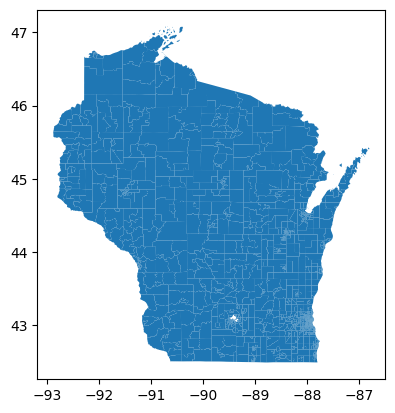

In [9]:
df.plot()

In [ ]:
# How can we get a clean dataset of COVID deaths in WI?

In [11]:
# TODO: communicate in final results what percent of values were guessed (imputed)
df = df.replace(-999, 2) # 2 is between 0-4

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

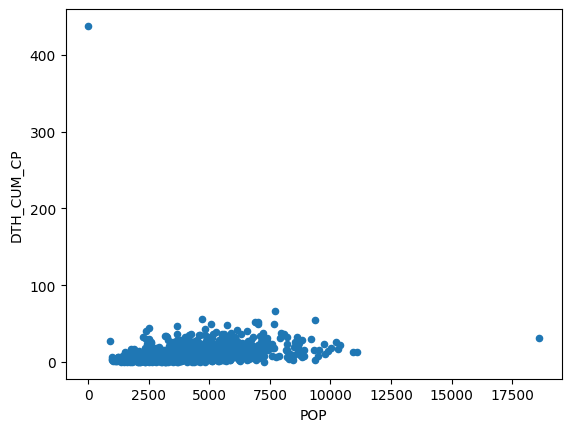

In [12]:
df.plot.scatter(x="POP", y="DTH_CUM_CP")

In [13]:
df[df["DTH_CUM_CP"] > 300]

,RptDt,GEOID,GEOName,POS_CUM_CP,POS_NEW_CP,POS_7DAYAVG_CP,DTH_CUM_CP,DTH_NEW_CP,DTH_7DAYAVG_CP,DTH_OVER_30DAYS_CP,...,HOSP_NO_CP,HOSP_UNK_CP,Date,POP,POP_MOE,OBJECTID,GEO,Shape.STArea(),Shape.STLength(),geometry
1392,1668024000000,TRACT N/A,None,48333,40,33.71,438,0,0.0,0,...,21173,25324,1667887200000,0,NaN,2235,Census tract,466.180086,80.071546,"POLYGON ((-87.04159 44.13490, -87.04161 44.134..."


In [18]:
df["GEOID"].str.fullmatch(r"\d+").value_counts()

True     1392
False       1
Name: GEOID, dtype: int64

<AxesSubplot:xlabel='POP', ylabel='DTH_CUM_CP'>

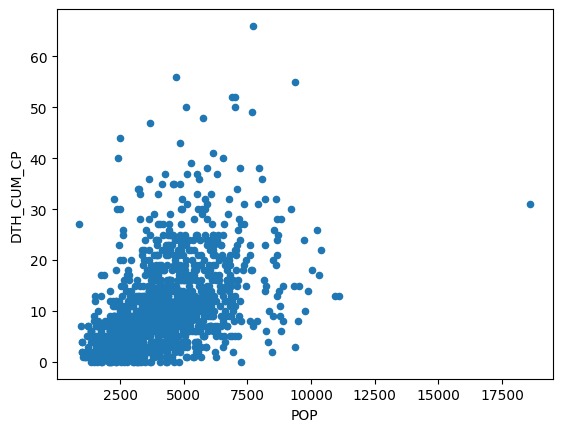

In [19]:
df = df[df["GEOID"].str.fullmatch(r"\d+")]
df.plot.scatter(x="POP", y="DTH_CUM_CP")

In [ ]:
# How can we train/fit models to known data to predict unknowns?
# Population => Deaths, Cases => Deaths, Cases by Age => Deaths

In [ ]:
# model = ????
# model.fit(X, y)
# y = model.predict(X)

In [24]:
df[["POP"]].head()

,POP
0,2870
1,1244
2,2599
3,4533
4,1603


In [26]:
df["DTH_CUM_CP"].head()

0    13
1     5
2     7
3    25
4     0
Name: DTH_CUM_CP, dtype: int64

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[["POP"]], df["DTH_CUM_CP"])
y = model.predict(df[["POP"]]) # TODO: use x values for new places

In [32]:
# hypothetical census tracts -- what is the predicted death count?
import pandas as pd
predict_df = pd.DataFrame({"POP": [1000,2000,3000]})
predict_df["predicted deaths"] = model.predict(predict_df)
predict_df

,POP,predicted deaths
0,1000,3.794165
1,2000,6.026414
2,3000,8.258662


In [ ]:
# How can we visualize model predictions?

In [ ]:
# How can we get a formula for the relationship?

In [ ]:
# How well does our model fit the data?

In [ ]:
# Did our model learn, or just memorize (that is, "overfit")?

In [ ]:
# How can we minimize noise due to random train/test splits?

In [ ]:
# How can we compare models?

In [ ]:
# How can we use multiple x variables (multiple regression)?

In [ ]:
# How can we interpret what features the model is relying on?